This notebook aims at **testing the two-layer Arctic hypothesis**. We expected the surface current in the main Arctic (Canada Basin + Makarov Basin) goes in cyclonic way and anti-cyclonic in deeper layer.

Therefore, this notebook plots the surface layer and the salinity maximum layer to see whether the hypothesis is right or not. 

**Conclusion: The surface current is not going in a cyclonic way. Have to say this hypothesis is not right at the first place..:(. But the good news is that the simulated flow is very closed to the geostrophic pattern, which means 'geostrophic flow' might be the answer to our original question - why the flow goes in an anti-cyclonic way.**

In [1]:
import copy,os,glob
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import cm,addcyclic,Basemap, shiftgrid
from ArcticTools import hovmoller as hov
from ArcticTools import geostropic as geo
% matplotlib inline

In [2]:
import seaborn as sn
import seawater as sw

import warnings
warnings.filterwarnings('ignore')

In [3]:
import importlib
importlib.reload(hov)

<module 'ArcticTools.hovmoller' from '/ocean/xiaoxiny/research/tools/ArcticTools/hovmoller.py'>

In [4]:
with nc.Dataset(sorted(glob.glob('/ocean/xiaoxiny/research/result_jasper/min_ice/para60Run/result/ENG319582008.nc'))[0]) \
as ptrc:
    nav_lon = ptrc.variables['nav_lon'][:,:]
    nav_lat = ptrc.variables['nav_lat'][:,:]
    dep  =  ptrc.variables['deptht'][:]


tmask = nc.Dataset(
        '/ocean/xiaoxiny/research/NEMO-code/NEMOGCM/CONFIG/myANHA/EXP00/crop.nc')
mbathy = tmask.variables['mbathy'][0,400:,:]
tmask = tmask.variables['tmask'][0,:,400:,:]


bathy = nc.Dataset(
    '/ocean/xiaoxiny/research/data/Jasper/ANHA4_bathy_etopo1_gebco1_smoothed_coast_corrected_mar10.nc')
bathy = bathy.variables['Bathymetry'][400:,:]

In [5]:
uvel = nc.Dataset('/ocean/xiaoxiny/research/result_jasper/data_eng3/ANHA4-ENG3_gridU_19692008.nc')
vvel = nc.Dataset('/ocean/xiaoxiny/research/result_jasper/data_eng3/ANHA4-ENG3_gridV_19692008.nc')

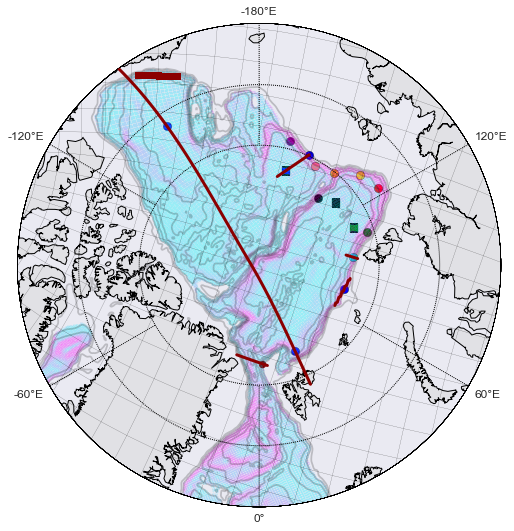

In [6]:
# test functions above
fig  =  plt.figure(figsize = (13/1.5,13/1.5))
ax  =  fig.add_subplot()
m,x_lon,y_lat = hov.mapping(70)


# extra points
x_mb1,y_mb1,a_mb1,b_mb1 = hov.section(x0 = -105,y0 = 303,length = 1,xi = 1,yi = -1, x_lon=x_lon, y_lat=y_lat)
m.scatter(a_mb1[0],b_mb1[0], s=70,c='purple')

x_nb0,y_nb0,a_nb0,b_nb0 = hov.section(x0 = -170,y0 = 365,length = 10,xi = 0,yi = 1, x_lon=x_lon, y_lat=y_lat)
m.scatter(a_nb0[5],b_nb0[5], s=70, c='cyan')
m.plot(a_nb0[:],b_nb0[:],color = 'darkred',linewidth = 3)

x_nb1,y_nb1,a_nb1,b_nb1 = hov.section(x0 = -150,y0 = 365,length = 11,xi = 0,yi = 1, x_lon=x_lon, y_lat=y_lat)
m.scatter(a_nb1[10],b_nb1[10], s=70, c='green')
m.scatter(a_nb1[0],b_nb1[0], s=70, c='green', marker ='s')

x_nb2,y_nb2,a_nb2,b_nb2 = hov.section(x0 = -120,y0 = 373,length = 1,xi = 1,yi = 1, x_lon=x_lon, y_lat=y_lat)
m.scatter(a_nb2[0],b_nb2[0], s=70,c='r')

x_nb3,y_nb3,a_nb3,b_nb3 = hov.section(x0 = -115,y0 = 358,length = 1,xi = 1,yi = 1, x_lon=x_lon, y_lat=y_lat)
m.scatter(a_nb3[0],b_nb3[0], s=70,c='gold')

x_nb4,y_nb4,a_nb4,b_nb4 = hov.section(x0 = -118,y0 = 340,length = 1,xi = 1,yi = 1, x_lon=x_lon, y_lat=y_lat)
m.scatter(a_nb4[0],b_nb4[0], s=70,c='orange')

x_mb2,y_mb2,a_mb2,b_mb2 = hov.section(x0 = -117,y0 = 325,length = 1,xi = 1,yi = -1, x_lon=x_lon, y_lat=y_lat)
m.scatter(a_mb2[0],b_mb2[0], s=70,c='salmon')

x_lr,y_lr,a_lr,b_lr = hov.section(x0 = -137,y0 = 333,length = 15,xi = 0,yi = 1, x_lon=x_lon, y_lat=y_lat)
m.scatter(a_lr[0],b_lr[0], s=70,c='k')
m.scatter(a_lr[-1],b_lr[-1], s=70,c='k', marker ='s')



#sec1 Makarov
x_mb,y_mb,a_mb,b_mb = hov.section(x0 = -130,y0 = 300,length = 20,xi = 1,yi = 1, x_lon=x_lon, y_lat=y_lat)
m.plot(a_mb[:],b_mb[:],color = 'darkred',linewidth = 3)
#m.scatter(a_mb[15],b_mb[15],color = 'darkred',linewidth = 3)
m.scatter(a_mb[-1],b_mb[-1], s=70)
m.scatter(a_mb[5],b_mb[5], s=70,marker='s')

#sec2 Nansen
x_ns,y_ns,a_ns,b_ns = hov.section(x0 = -210,y0 = 368,length = 25,xi = 1,yi = 0.2, x_lon=x_lon, y_lat=y_lat)
m.plot(a_ns[:],b_ns[:],color = 'darkred',linewidth = 3)
m.scatter(a_ns[-10],b_ns[-10], s=70)
#m.scatter(a_ns[15],b_ns[15],color = 'darkred',linewidth = 3)


#sec3 CB
x_cb,y_cb,a_cb,b_cb = hov.section(x0 = 330,y0 = 170,length = 100,xi = -2,yi = 2, x_lon=x_lon, y_lat=y_lat)
m.plot(a_cb[:],b_cb[:],color = 'darkred',linewidth = 3)
m.scatter(a_cb[-10],b_cb[-10], s=70)
m.scatter(a_cb[20],b_cb[20], s=70)

# south CB
x_scb,y_scb,a_scb,b_scb = hov.section(x0 = 325,y0 = 185,length = 30,xi = 0,yi = 1, x_lon=x_lon, y_lat=y_lat)
m.plot(a_scb[:],b_scb[:],color = 'darkred',linewidth = 3, marker ='s')

#sec4 Fram strait 
x_fs,y_fs,a_fs,b_fs = hov.section(x0 = -265,y0 = 310,length =25 ,xi = 0 ,yi = 1, x_lon=x_lon, y_lat=y_lat)
m.plot(a_fs[:],b_fs[:],color = 'darkred',linewidth = 3)
m.scatter(a_fs[-5],b_fs[-5],color = 'darkred',linewidth = 3)

# plot one velocity snapshot, make sure my profile is not far away from the pathway
data  = (uvel.variables['vozocrtx'][5,35,400:,:]**2 + vvel.variables['vomecrty'][5,35,400:,:]**2)**0.5
m.pcolor(x_lon,y_lat,data[:,:],cmap = 'cool',vmax = 0.04, alpha = 0.1)

In [7]:
with nc.Dataset('/ocean/xiaoxiny/research/data/mesh_mask_anha4_201509.nc') as mesh:
    e1t= mesh.variables['e1t'][0,400:]  # dx
    e2t= mesh.variables['e2t'][0,400:]  # dy 
    e3t= mesh.variables['e3t'][0,:,400:,:]
    tmask= mesh.variables['tmask'][0,:,400:,:]

    
def flux(u,v,e1t=e1t, e2t=e2t, e3t=e3t, tmask=tmask):
    '''    
    flux_x = u * dy * dz
    flux_y = v * dx * dz
    '''
    flux_xy= {'flux_x': np.zeros((e3t.shape[0],e1t.shape[0],e1t.shape[1]))\
             ,'flux_y': np.zeros((e3t.shape[0],e1t.shape[0],e1t.shape[1]))}  
    
    dx = e1t;
    dy = e2t;
    dz = e3t;
    
    for num in range (dz.shape[0]):
        flux_xy['flux_x'][num,...] = u[num,...]*dy*dz[num,...];
        flux_xy['flux_y'][num,...] = v[num,...]*dx*dz[num,...];
        
    # mask     
    #for flux_key in flux_xy.keys():
    #    flux_xy[flux_key][tmask==0]=np.nan
        
    return flux_xy



def vel(keyword,T,ENG):
    'design to obtain velocity field'
    if keyword =='U':
        nc_filename=sorted(glob.glob('/ocean/xiaoxiny/research/result_jasper/data_eng3/*%s*U*%s*.nc'%(ENG,T)))
        uvel=nc.Dataset(nc_filename[0])        
        data =uvel.variables['vozocrtx'][0,:,400:,:]
    else:
        nc_filename=sorted(glob.glob('/ocean/xiaoxiny/research/result_jasper/data_eng3/*%s*V*%s*.nc'%(ENG,T)))
        vvel=nc.Dataset(nc_filename[0])
        data =vvel.variables['vomecrty'][0,:,400:,:]
    data =np.ma.masked_where(tmask==0,data)
    return data

def cal_curl(yearnum,startyear,inputx,inputy,ENG):
    
    sec_influx=[]
    year=[]
    vel_= {'u15':[],'u25':[],'u30':[],'u35':[], 'u39':[]}
    vkey={'u15':15,'u25':25, 'u30':30, 'u35':35 , 'u39':39}
    
    for time in range (yearnum):

        # loading vel
        u =vel('U',time+startyear,ENG)
        v =vel('V',time+startyear,ENG)
        aindex=x_scb
        bindex=y_scb
        for i,vlayer in zip (vel_.keys(),vkey.keys()):
            uvel = np.average(u[vkey[vlayer],aindex,bindex])
            vel_[i].append(uvel)
            
            
        # calculating flux - before rotation
        flux_b = flux(u,v)
        
        # Fram strait, roate, from grid to along/across section
                            
        cr_flux = flux_b['flux_y'][:,inputx,inputy] 
        al_flux = flux_b['flux_x'][:,inputx,inputy]
     
        influx =np.ma.masked_where(cr_flux<=0,cr_flux)
        sec_influx.append(np.sum(np.ma.masked_invalid(influx)))
    
        year.append(time+startyear)

    return np.array(sec_influx), np.array(year),vel_

In [8]:
influx,year,vel_= cal_curl(yearnum=50,startyear=1958,inputx=x_nb0,inputy=y_nb0,ENG='ENG3')

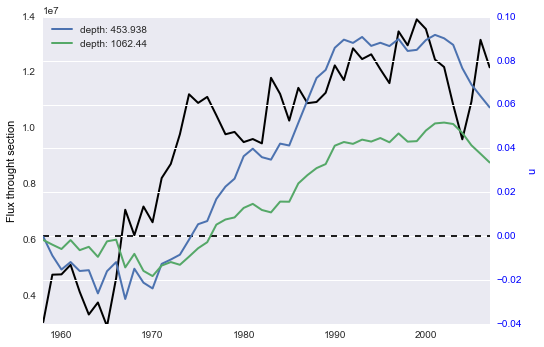

In [9]:
fig, ax1 = plt.subplots()
ax1.plot(year[:],influx[:],'k',\
         lw=2,label='influx')

ax1.set_ylabel('Flux throught section' , color='k')
ax1.set_ylim(0.3e7,1.4e7);ax1.grid(False)

ax2 = ax1.twinx()
ax2.plot(year,np.ma.masked_invalid(vel_['u30'][:]),lw=2,label='depth: %s'%dep[30])
ax2.plot(year,np.ma.masked_invalid(vel_['u35'][:]),lw=2,label='depth: %s'%dep[35])

ax2.set_ylabel('u', color='blue')
for tl in ax2.get_yticklabels():
    tl.set_color('blue')
plt.legend(loc=2)
ax2.hlines(y=0,xmin=np.min(year),xmax=np.max(year),linestyles='--')
ax2.set_xlim(year.min(),year.max())
plt.show()

In [10]:
influx,year,vel_= cal_curl(yearnum=13,startyear=2002,inputx=x_nb0,inputy=y_nb0,ENG='EXH001')

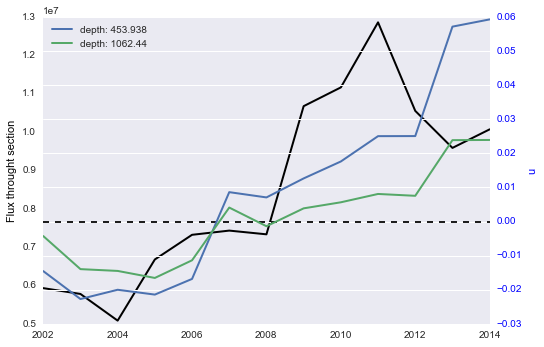

In [11]:
fig, ax1 = plt.subplots()
ax1.plot(year[:],influx[:],'k',\
         lw=2,label='influx')

ax1.set_ylabel('Flux throught section' , color='k')
ax1.grid(False)


ax2 = ax1.twinx()
ax2.plot(year,np.ma.masked_invalid(vel_['u30'][:]),lw=2,label='depth: %s'%dep[30])
ax2.plot(year,np.ma.masked_invalid(vel_['u35'][:]),lw=2,label='depth: %s'%dep[35])

ax2.set_ylabel('u', color='blue')
for tl in ax2.get_yticklabels():
    tl.set_color('blue')
plt.legend(loc=2)
ax2.hlines(y=0,xmin=np.min(year),xmax=np.max(year),linestyles='--')
plt.show()

In [7]:
def section_hovmoller(indexa,indexb,data,layer,tmask, nav_lon):
    '''load data for vertical profiles, return to tracer/cooridination 
     ================================================================
     
    arg:  data: 4-dimension model result from NEMO model 
    type: data: np.array
    
    arg:  layer: for a desired depth of the field
    type: layer: interger
    
    arg:  length: length of the section  (Longer the section, bigger this number)
    type: length: interger   
    
    arg:  x0, y0: the starting point of the section.  
    type: x0, y0: interger

    arg:  xi, yi: slope  example: xi  =  0.5 then x0 + 0.5 * i
    type: xi, yi: floats/interger 
                 (If choose floats, index could be floats as well but it will Round to nearest integer)

    '''
    temp = np.zeros((data.shape[0],layer, len(indexa)))
    for i in range (layer):
        temp[:,i,...] = data[:,i,indexa,indexb]
        for k in range (data.shape[0]):
            temp[k,i,...][tmask[i,indexa,indexb] == 0] = np.nan

    coordinate = nav_lon[indexa,indexb]
    return temp,coordinate


def load_v(vel_comp,T, tmask, ENG, key ):
    '''
    This function is designed to obtain velocity field
    ======================================================
    '''
    vels ={'U':'vozocrtx','V':'vomecrty','W':'vovecrtz'}

    with nc.Dataset(glob.glob('/ocean/xiaoxiny/research/result_jasper/data_eng3/*%s*%s*%s.nc'%(ENG,vel_comp,T))[0])\
as temp:
        data  = temp.variables[vels[vel_comp]][0,:,400:,:]
        data [tmask == 0] = np.nan
    return data

In [8]:
# assign t-maximum layer to one array
temp= hov.load_ts('T',T=2002,tmask= tmask, ENG='exh001', key = '_t_')
layer= np.zeros_like(nav_lon)
depth=np.zeros_like(nav_lon)
for i in range (layer.shape[0]):
    for j in range (layer.shape[1]):
        layer[i,j] = np.ma.masked_invalid(temp[:45,i,j]).argmax()
        depth[i,j] = dep[layer[i,j]]

depth [tmask [30,:,:]==0] = np.nan

temp= hov.load_ts('T',T=2014,tmask= tmask, ENG='exh001', key = '_t_')
layer2014= np.zeros_like(nav_lon)
depth2014=np.zeros_like(nav_lon)
for i in range (layer2014.shape[0]):
    for j in range (layer2014.shape[1]):
        layer2014[i,j] = np.ma.masked_invalid(temp[:45,i,j]).argmax()
        depth2014[i,j] = dep[layer2014[i,j]]

depth2014 [tmask [30,:,:]==0] = np.nan

##### Visualize temp. maximum layer in 2002 and 2013

* depth plot

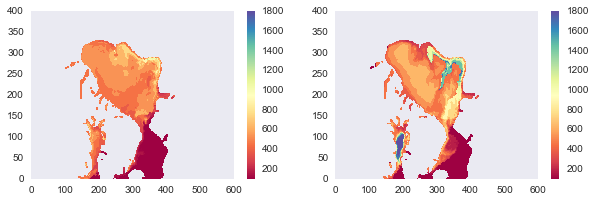

In [14]:
# visualize t-maximum layer
fig=plt.figure(figsize=(10,3))
plt.subplot(121)
plt.pcolor(np.ma.masked_invalid(depth), cmap='Spectral',vmin=100,vmax=1800)
plt.colorbar()
plt.subplot(122)
plt.pcolor(np.ma.masked_invalid(depth2014), cmap='Spectral',vmin=100,vmax=1800)
plt.colorbar()

* layer plot

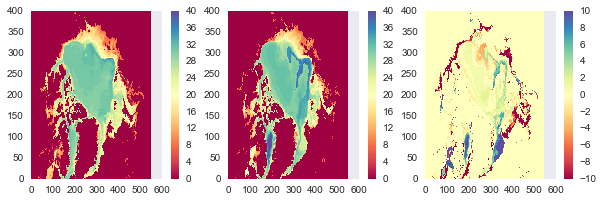

In [15]:
# visualize t-maximum layer
fig=plt.figure(figsize=(10,3))
plt.subplot(131)
plt.pcolor(layer, cmap='Spectral',vmin=0,vmax=40)
plt.colorbar()
plt.subplot(132)
plt.pcolor(layer2014, cmap='Spectral',vmin=0,vmax=40)
plt.colorbar()
plt.subplot(133)
plt.pcolor(layer2014-layer, cmap='Spectral',vmin=-10,vmax=10)
plt.colorbar()

In [9]:
# grid for plotting
x1d=np.linspace(0,nav_lon[:,0].shape[0],nav_lat[:,0].shape[0])
y1d=np.linspace(0,nav_lon[0,:].shape[0],nav_lat[0,:].shape[0])
x2d,y2d=np.meshgrid(y1d,x1d)

# s & T at the scatter point

In [10]:
# preprae data -- t
Temp = np.zeros((2014-2002,50,nav_lon.shape[0],nav_lon.shape[1]))
for i in range (2014-2002):
    data= hov.load_ts('T',T=i+2002,tmask= tmask, ENG='exh001', key = '_t_')
    Temp[i,...]=data
    
temp,coor = section_hovmoller(indexa=x_mb,indexb=y_mb,data=Temp,layer=50,tmask=tmask, nav_lon=nav_lon)


# preprae data -- s
Temp = np.zeros((2014-2002,50,nav_lon.shape[0],nav_lon.shape[1]))
for i in range (2014-2002):
    data= hov.load_ts('S',T=i+2002,tmask= tmask, ENG='exh001', key = '_s_')
    Temp[i,...]=data
salinity,coor = section_hovmoller(indexa=x_mb,indexb=y_mb,data=Temp,layer=50,tmask=tmask, nav_lon=nav_lon)


# preprae data -- u
Temp = np.zeros((2014-2002,50,nav_lon.shape[0],nav_lon.shape[1]))
for i in range (2014-2002):
    data= load_v('U',T=i+2002,tmask= tmask, ENG='EXH001', key = 'U')
    Temp[i,...]=data
    
u,coor = section_hovmoller(indexa=x_mb,indexb=y_mb,data=Temp,layer=50,tmask=tmask, nav_lon=nav_lon)

# preprae data -- v
Temp = np.zeros((2014-2002,50,nav_lon.shape[0],nav_lon.shape[1]))
for i in range (2014-2002):
    data= load_v('V',T=i+2002,tmask= tmask, ENG='EXH001', key = 'V')
    Temp[i,...]=data
v,coor = section_hovmoller(indexa=x_mb,indexb=y_mb,data=Temp,layer=50,tmask=tmask, nav_lon=nav_lon)



Take a  look at the vertical profile at the scatter point: (quick test on the function that finds maximum layer)

In [11]:
temp[-1,:50.,-1]

array([-1.63499129, -1.63412893, -1.63385987, -1.63358295, -1.63335824,
       -1.63273549, -1.63173485, -1.63079882, -1.62966383, -1.62733424,
       -1.62368643, -1.61934364, -1.61572301, -1.60722089, -1.60092211,
       -1.59804976, -1.60030055, -1.60303128, -1.59117055, -1.5036912 ,
       -1.35385752, -1.16882539, -0.94371819, -0.7798751 , -0.6448034 ,
       -0.48593605, -0.3336896 , -0.22078373, -0.15008312, -0.07817651,
       -0.01744907,  0.03249633,  0.0669677 ,  0.09375063,  0.12122285,
        0.12867968,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan])

In [12]:
np.ma.masked_invalid(temp[i,:50.,-1]).argmax()

35

In [13]:
temp[-1,35,-1]

0.12867967784404755

In [14]:
# preprae data -- t
def ts_profile(x,y,index, key_s_lim= 'False'):
    
    Temp = np.zeros((2014-2002,50,nav_lon.shape[0],nav_lon.shape[1]))
    for i in range (2014-2002):
        data= hov.load_ts('T',T=i+2002,tmask= tmask, ENG='exh001', key = '_t_')
        Temp[i,...]=data

    temp,coor = section_hovmoller(indexa=x,indexb=y,data=Temp,layer=50,tmask=tmask, nav_lon=nav_lon)


    # preprae data -- s
    Temp = np.zeros((2014-2002,50,nav_lon.shape[0],nav_lon.shape[1]))
    for i in range (2014-2002):
        data= hov.load_ts('S',T=i+2002,tmask= tmask, ENG='exh001', key = '_s_')
        Temp[i,...]=data
    salinity,coor = section_hovmoller(indexa=x,indexb=y,data=Temp,layer=50,tmask=tmask, nav_lon=nav_lon)
    
    temp[salinity ==0 ] = np.nan
    salinity[salinity ==0 ] = np.nan
    
    temp=np.ma.masked_invalid(temp)
    salinity=np.ma.masked_invalid(salinity)

    print ('temp maximum (2013): layer %s, depth %s'%(temp[-1,:50.,index].argmax(),dep[temp[-1,:50.,index].argmax()]))
    print ('salinity maximum (2013): layer %s, depth %s'%(salinity[-1,:50.,index].argmax(),dep[salinity[-1,:50.,index].argmax()]))
    
    fig  =  plt.figure(figsize = (18,9/1.2))
    ax = plt.subplot(3,4,1)
    for i,c in zip([0,5,10],[sn.color_palette('deep')[0],sn.color_palette('deep')[1],sn.color_palette('deep')[2]]):
        plt.plot(np.ma.masked_invalid(temp[i,:45.,index]),dep[:45],color=c) #[0,...] means 
    plt.ylim(0,2500)
    plt.gca().invert_yaxis()
    plt.xlabel('temp')

    ax = plt.subplot(3,4,2)
    for i,c in zip([0,5,10],[sn.color_palette('deep')[0],sn.color_palette('deep')[1],sn.color_palette('deep')[2]]):
        plt.plot(np.ma.masked_invalid(salinity[i,:45.,index]),dep[:45],color=c)
    plt.ylim(0,2500)
    plt.gca().invert_yaxis()
    plt.xlabel('salinity')
    
    ax = plt.subplot(3,4,3)
    for i,c in zip([0,5,10],[sn.color_palette('deep')[0],sn.color_palette('deep')[1],sn.color_palette('deep')[2]]):
        t = sw.library.T90conv(temp[i,:50.,index])
        rho = sw.dens0(salinity[i,:50.,index], t)
        plt.plot(np.ma.masked_invalid(rho),dep[:50],label=i+2002,color=c)
    plt.ylim(0,2500)
    plt.xlim(1027.5,1028.5)
    plt.gca().invert_yaxis()
    plt.xlabel('density')
    plt.legend(loc=0)
    
    
    ax = plt.subplot(3,4,4)
    for i,c in zip([0,5,10],[sn.color_palette('deep')[0],sn.color_palette('deep')[1],sn.color_palette('deep')[2]]):
        plt.scatter(np.ma.masked_invalid(salinity[i,:45.,index]),np.ma.masked_invalid(temp[i,:45.,index])\
                    ,color=c,label=i+2002)
    if key_s_lim == 'True':
        plt.xlim(32,35.5)
    plt.xlabel('s')
    plt.ylabel('t')
    plt.legend(loc=2)
    plt.show()

The penetration and subduction of warm, salty water into the Arctic Ocean from the North Atlantic via Fram Strait is clearly evident,

This water forms the Atlantic layer and is dominant feature at a depth of 500m. 

The flow in the Eurasian basin consists of a large single-cell cyclonic gyre. Near the continental shelf break of the Laptev Sea, the Eurasian basian water is seen to flow on  into the Candadian Basian by flowing over the Lomonsov ridge.


# Fram strait

temp maximum (2013): layer 32, depth 643.567
salinity maximum (2013): layer 33, depth 763.333


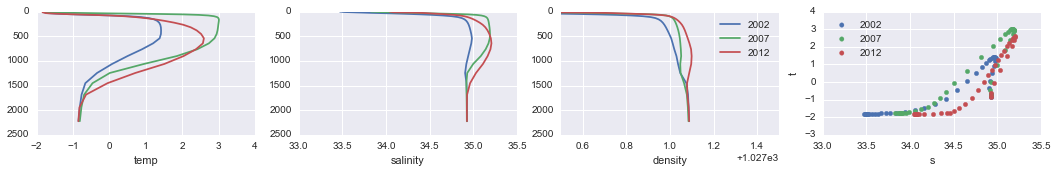

In [22]:
ts_profile(x=x_fs,y=y_fs,index=-5)

# close to Fram strait

temp maximum (2013): layer 33, depth 763.333
salinity maximum (2013): layer 33, depth 763.333


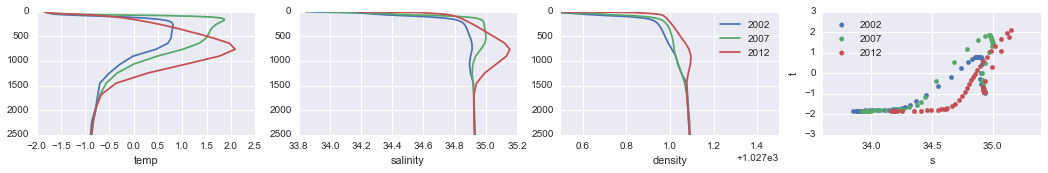

In [23]:
ts_profile(x=x_cb,y=y_cb,index=-10)

* Note that the density profile is ver similar with salinity profiles before I zoomed in. However, in order to take a closer look at depth, I zoomed in the density profile by limiting x lim **from 1027 to 1028.5**. 

# Eurasian Basin 

** (ANNA ->cyan -> Green -> red -> gold -> orange points-> enter MB/LomosovR) **

> On the pathway1 (ANHA --> cyan --> Green ), the temp. max. layer **was pushed down** from 900m to 1600m (due to the loss of buoyancy?). And then the layer **was lifted again**.

> ** Observations provided critical information about the evolution of an unprecedentedly strong AW warm pulse from its entrance into the eastern Arctic Ocean as it decays along its path into the Eurasian Basin interior. (suggests that some other, non-advective forces modulate temperature there)**

> EXH001: for deeper layer, less warmer along the pathway; for upper layer, less cooler along the pathway

temp maximum (2013): layer 34, depth 902.339
salinity maximum (2013): layer 34, depth 902.339


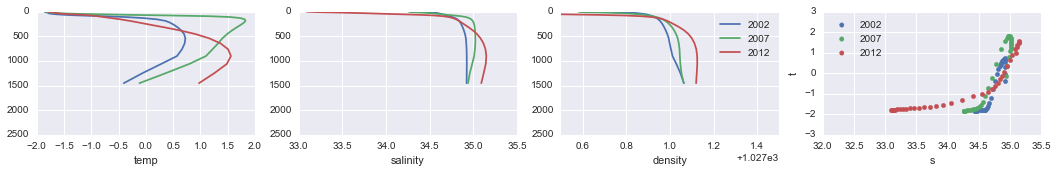

temp maximum (2013): layer 36, depth 1245.29
salinity maximum (2013): layer 37, depth 1452.25


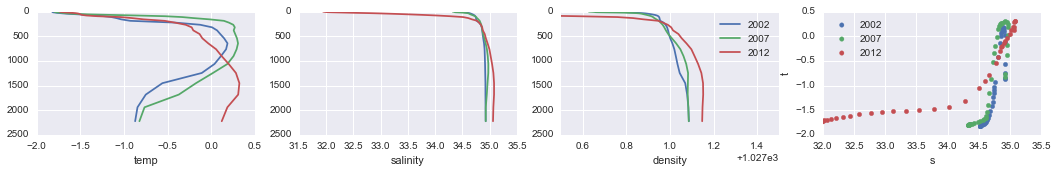

temp maximum (2013): layer 36, depth 1245.29
salinity maximum (2013): layer 38, depth 1684.28


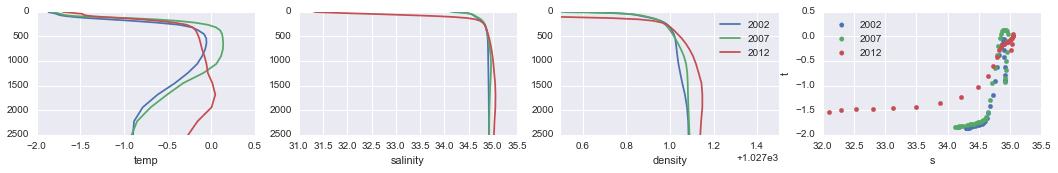

temp maximum (2013): layer 35, depth 1062.44
salinity maximum (2013): layer 36, depth 1245.29


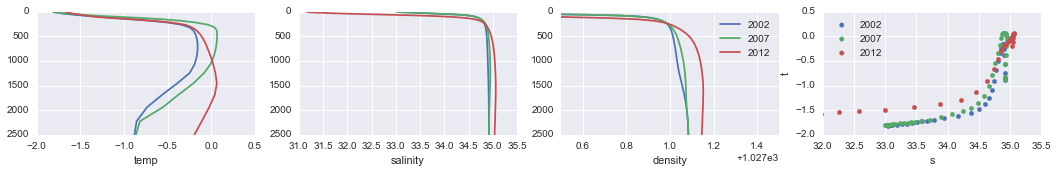

temp maximum (2013): layer 35, depth 1062.44
salinity maximum (2013): layer 35, depth 1062.44


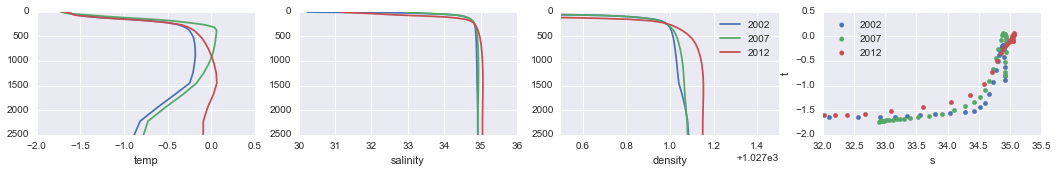

temp maximum (2013): layer 35, depth 1062.44
salinity maximum (2013): layer 36, depth 1245.29


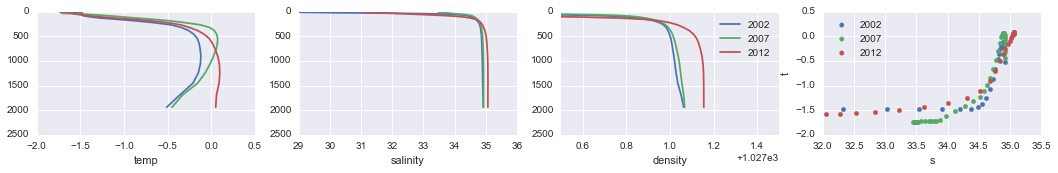

In [29]:
ts_profile(x=x_ns,y=y_ns,index=-15,key_s_lim= 'True')
ts_profile(x=x_nb0,y=y_nb0,index=5,key_s_lim= 'True')
ts_profile(x=x_nb1,y=y_nb1,index=10,key_s_lim= 'True')
ts_profile(x=x_nb2,y=y_nb2,index=0,key_s_lim= 'True')
ts_profile(x=x_nb3,y=y_nb3,index=0,key_s_lim= 'True')
ts_profile(x=x_nb4,y=y_nb4,index=0,key_s_lim= 'True')

# Lomonsov Ridge

(black dot)

The profile at the black dot is similar with the orange point (the place where Altantic inflow developed into two arms.) The temp maximum layer is 1245.29, which is at the same depth as the temp. max. at MB.

temp maximum (2013): layer 36, depth 1245.29
salinity maximum (2013): layer 37, depth 1452.25


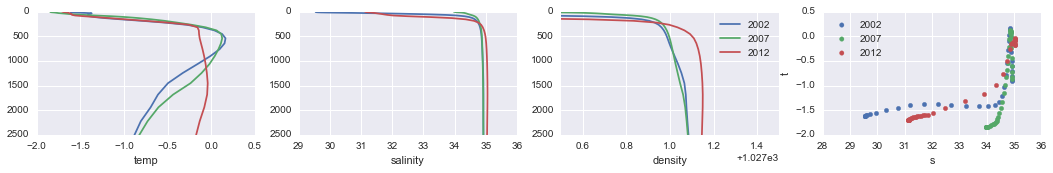

In [25]:
ts_profile(x=x_lr,y=y_lr,index=0, key_s_lim= 'True')

# MB 

(pink -> blue -> purple)

Comparing with profiles on Lomonsov R, this place might have another cooler water mass coming at about 600m.

temp maximum (2013): layer 36, depth 1245.29
salinity maximum (2013): layer 37, depth 1452.25


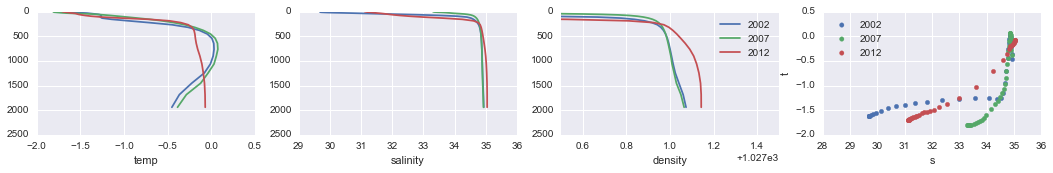

temp maximum (2013): layer 36, depth 1245.29
salinity maximum (2013): layer 37, depth 1452.25


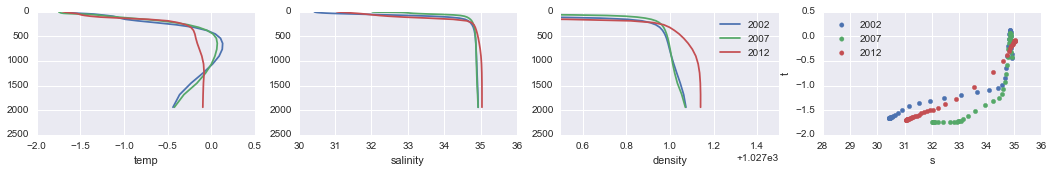

temp maximum (2013): layer 36, depth 1245.29
salinity maximum (2013): layer 37, depth 1452.25


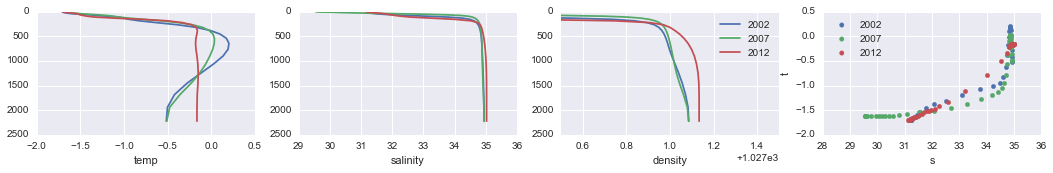

In [26]:
ts_profile(x=x_mb2,y=y_mb2,index=0, key_s_lim= 'True')
ts_profile(x=x_mb,y=y_mb,index=-3, key_s_lim= 'True')
ts_profile(x=x_mb1,y=y_mb1,index=0, key_s_lim= 'True')

# inside NB

temp maximum (2013): layer 30, depth 453.938
salinity maximum (2013): layer 39, depth 1941.89


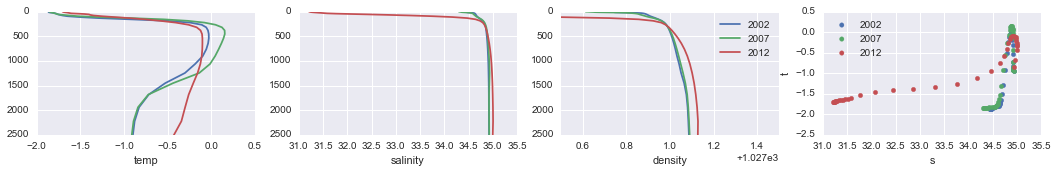

temp maximum (2013): layer 30, depth 453.938
salinity maximum (2013): layer 39, depth 1941.89


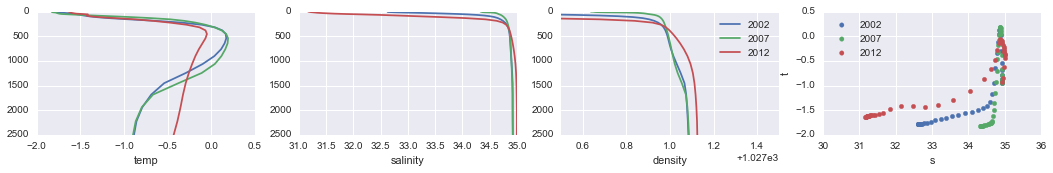

In [15]:
ts_profile(x=x_nb1,y=y_nb1,index=0)
ts_profile(x=x_lr,y=y_lr,index=-1)

# inside MB

temp maximum (2013): layer 31, depth 541.089
salinity maximum (2013): layer 41, depth 2533.34


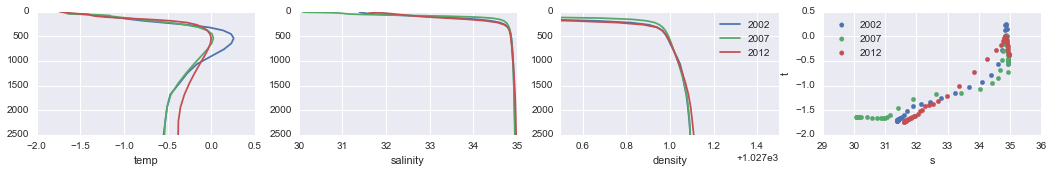

In [16]:
ts_profile(x=x_mb,y=y_mb,index=5)

# inside CB

temp maximum (2013): layer 32, depth 643.567
salinity maximum (2013): layer 44, depth 3597.03


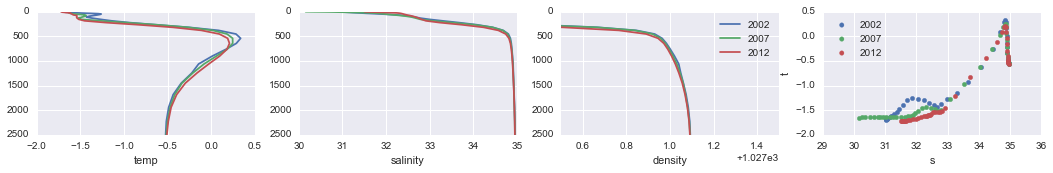

In [27]:
ts_profile(x=x_cb,y=y_cb,index=20)

???? What's the fresh water pattern looks like at surface?




# cyclonic year (2002) & anti-cyclonic(2014)  -- salinity maximum layer


> green arrows are goestrophic flow/ black arrows are flows from model. (They have the same scale.)


# Sal.

Trying to see what the u and v look like in temp maiximum layer

In [126]:
def load_smax(year,layer):

    # assign array

    ug_0 = np.zeros_like(tmask)
    vg_0 = np.zeros_like(tmask)
    P_0 = np.zeros_like(tmask)

    # loop over the depth dimension to get full-dimension geostrophic flow
    print ('>> loading geostrophic flow')
    for i in range (1,tmask.shape[0]):
        ug_0[i,:,:],vg_0[i,:,:],P_0[i,:,:],nav_lat,nav_lon = geo.geoflow(\
            modelt=nc.Dataset('/ocean/xiaoxiny/research/result_jasper/data_exh001/ANHA4-EXH001_gridT_t_year%s.nc'%year),
            models=nc.Dataset('/ocean/xiaoxiny/research/result_jasper/data_exh001/ANHA4-EXH001_gridT_s_year%s.nc'%year),
            modelssh=nc.Dataset('/ocean/xiaoxiny/research/result_jasper/data_exh001/ANHA4-EXH001_gridT_ssh_year%s.nc'%year),
            layer=i,ssh_key = 'True',detail = 'False')

    # load u, v, t, s
    print ('>> loading u, v, t, s')
    u= load_v('U',T=year,tmask= tmask, ENG='EXH001', key = 'U')
    v= load_v('V',T=year,tmask= tmask, ENG='EXH001', key = 'V')
    t= hov.load_ts('T',T=year,tmask= tmask, ENG='exh001', key = '_t_')
    s= hov.load_ts('S',T=year,tmask= tmask, ENG='exh001', key = '_s_')

    # set up a dictionary to contain all the model result
    model={'u':u,'v':v,'ug_0':ug_0,'vg_0':vg_0,\
           't':t,'s':s}
    
    # set up an empty dictionary for latter use     
    s_max={'u':np.zeros_like(nav_lon),'v':np.zeros_like(nav_lon),\
           'ug_0':np.zeros_like(nav_lon),'vg_0':np.zeros_like(nav_lon),\
           't':np.zeros_like(nav_lon),'s':np.zeros_like(nav_lon)}


    # select data from each local s max layer
    for i in range (layer.shape[0]):
        for j in range (layer.shape[1]):
            if layer[i,j] > 0:
                for ikey in s_max.keys():
                    s_max[ikey][i,j] = model[ikey][layer[i,j],i,j]

    # mask land
    for i in s_max.keys():
        s_max[i][s_max['s'] ==0 ] = np.nan
        s_max[i]=np.ma.masked_invalid(s_max[i])
    return s_max

In [31]:
# load data for 2002 and 2014
s_max_data= {'s_max_2002':load_smax(2002,layer=layer),'s_max_2014':load_smax(2014,layer=layer2014)}

>> loading geostrophic flow
>> loading u, v, t, s


/home/xiaoxiny/anaconda3/lib/python3.5/site-packages/numpy/ma/core.py:3117: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  dout = self.data[indx]
/home/xiaoxiny/anaconda3/lib/python3.5/site-packages/numpy/ma/core.py:3133: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  elif _mask is not nomask and _mask[indx]:
/home/xiaoxiny/anaconda3/lib/python3.5/site-packages/numpy/ma/core.py:4144: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


>> loading geostrophic flow
>> loading u, v, t, s


Plot temp. maximum layer with modeled velocity
year :2002


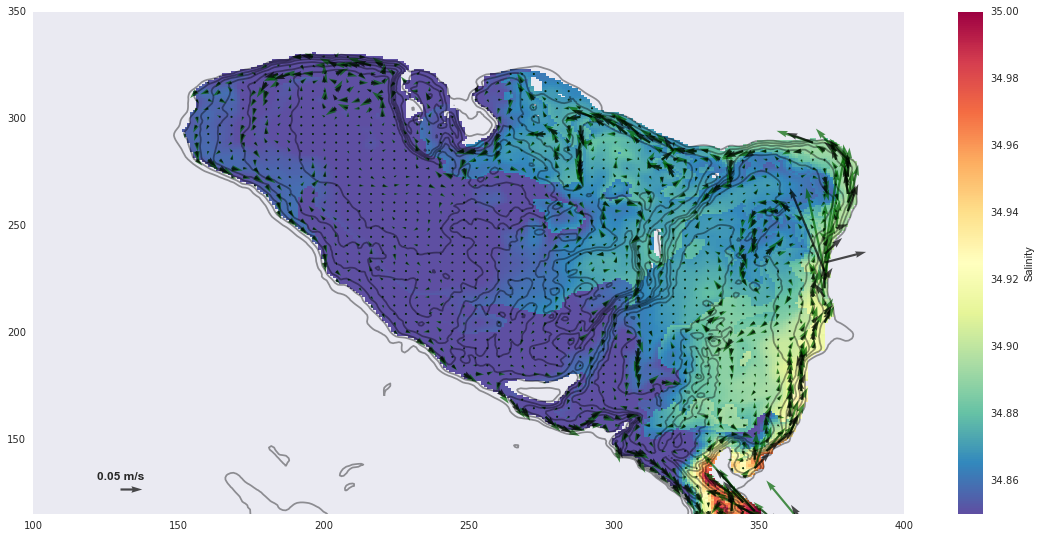

year :2014


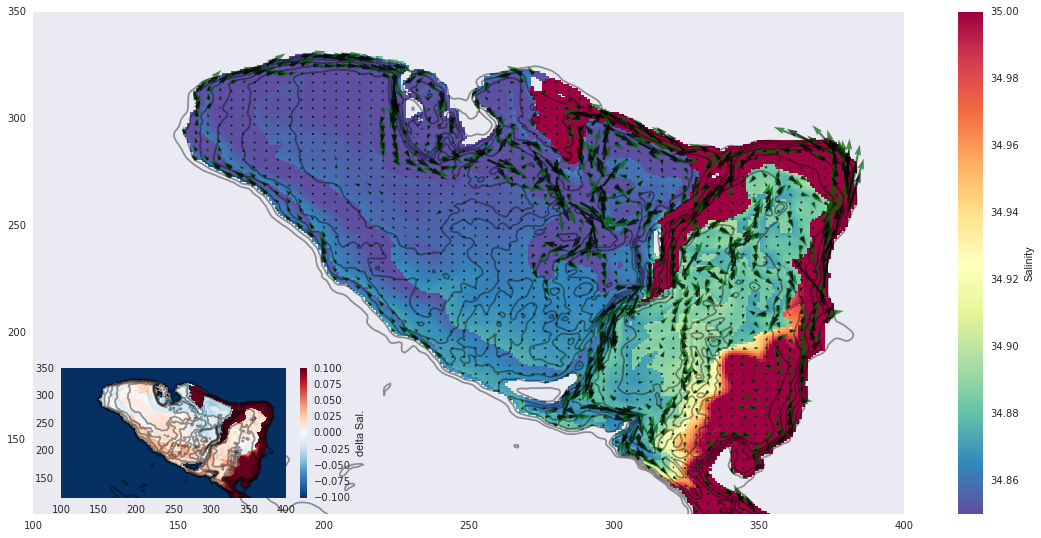

In [47]:
print ('Plot temp. maximum layer with modeled velocity')


for year,s_max, vmin,vmax,scale in zip ([2002,2014],[s_max_data['s_max_2002'],s_max_data['s_max_2014']],\
                                  [34.85,34.85],[35,35],[2,3.5]):
    print ("year :%s"%year)
    fig = plt.figure(figsize=(13*1.5,6*1.5))
    for i in s_max.keys():
        s_max[i][tmask[35,:,:]==0]=np.nan
    plt.pcolor(x2d[:,:], y2d[:,:], np.ma.masked_invalid(s_max['s']),cmap='Spectral_r',
               vmin=vmin,vmax=vmax)
                #vmin=np.ma.masked_invalid(P_0[:,:]).min()+3800, vmax=np.ma.masked_invalid(P_0[:,:]).max()-100);
    cbar=plt.colorbar()
    cbar.set_label('Salinity')
    #vector

    Q=plt.quiver(x2d[::4,::4], y2d[::4,::4], np.ma.masked_invalid(s_max['ug_0'][::4,::4]),\
                 np.ma.masked_invalid(s_max['vg_0'][::4,::4]),
                 scale=scale,width=0.0025,color='darkgreen',alpha=0.7)

    Q=plt.quiver(x2d[::4,::4], y2d[::4,::4], s_max['u'][::4,::4], s_max['v'][::4,::4],
               scale=scale,width=0.0025,color='k',alpha=0.7)
    Qlabel=plt.quiverkey(Q,0.1, 0.05, 0.05, '0.05 m/s',fontproperties={'weight': 'bold'})

    plt.contour(bathy,linewidth=0.075,colors='black',alpha=0.4)
    plt.ylim(115,350)    
    plt.xlim(100,400)

    if year == 2014:
        left, bottom, width, height = [0.145, 0.15, 0.2, 0.2]
        ax = fig.add_axes([left, bottom, width, height])
        im=ax.pcolor(x2d[:,:], y2d[:,:], s_max['s']-s_max_data['s_max_2002']['s'] \
                     ,vmin=-0.1,vmax=0.1,cmap='RdBu_r');
        cbar=fig.colorbar(im, ax=ax)
        cbar.set_label('delta Sal.')
        plt.contour(bathy,linewidth=0.075,colors='black',alpha=0.4)
        plt.ylim(115,350)    ;plt.xlim(100,400)

    plt.show()

The lower left plot shows the maximum salinity difference in the Arctic. 


# Temp. 

In 2014, significantly saltier, and warmer (see plots below) in Nansen Basin and Makarov Basin. Cooler boundary current at Alpha Ridge (see plots below).

year :2002


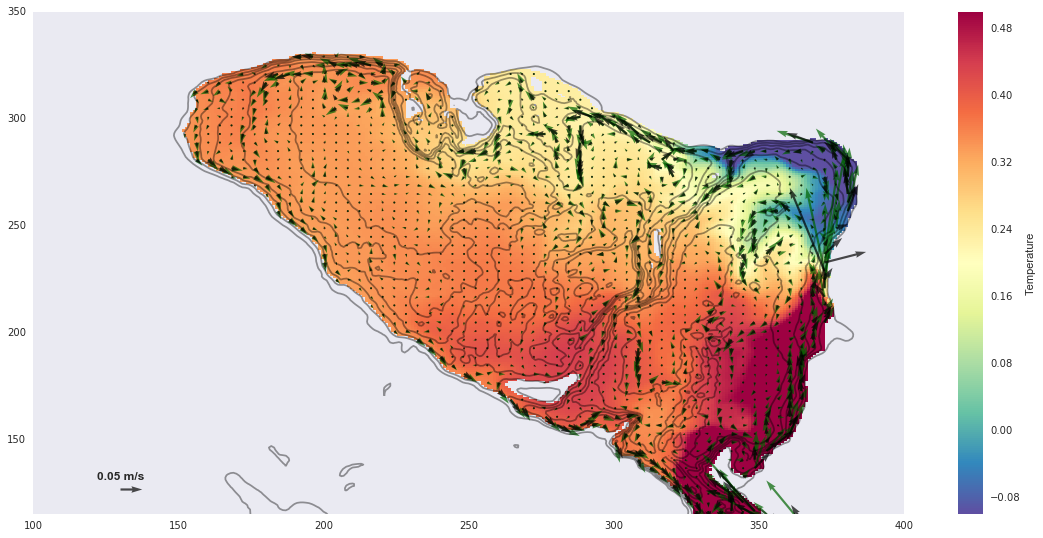

year :2014


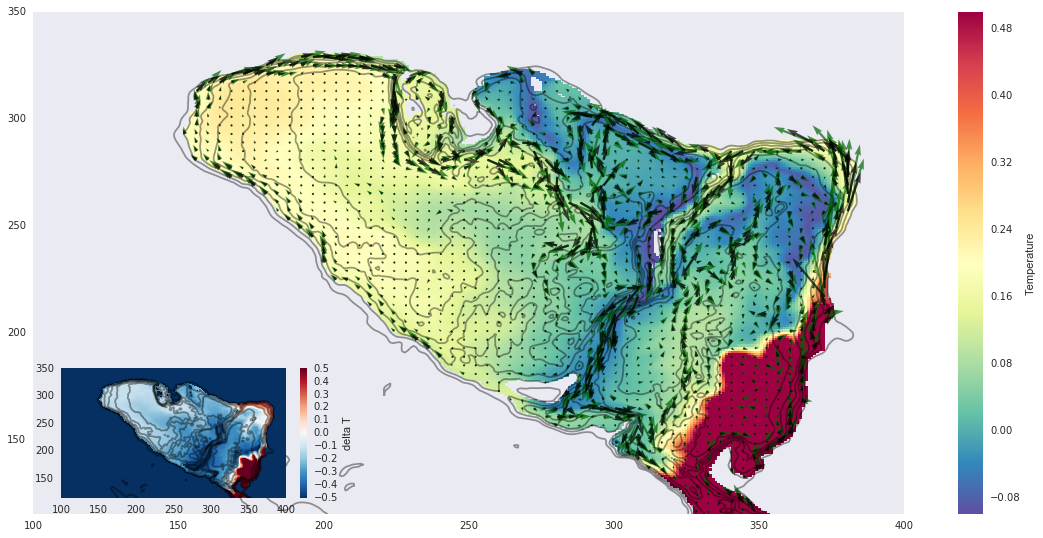

In [46]:
for year,s_max, vmin,vmax,scale in zip ([2002,2014],[s_max_data['s_max_2002'],s_max_data['s_max_2014']],\
                                  [-0.1,-0.1],[0.5,0.5],[2,3.5]):
    print ("year :%s"%year)
    fig = plt.figure(figsize=(13*1.5,6*1.5))    

    plt.pcolor(x2d[:,:], y2d[:,:], np.ma.masked_invalid(s_max['t']),cmap='Spectral_r',vmin=vmin,vmax=vmax)
                #vmin=np.ma.masked_invalid(P_0[:,:]).min()+3800, vmax=np.ma.masked_invalid(P_0[:,:]).max()-100);
    cbar=plt.colorbar()
    cbar.set_label('Temperature')
    #vector

    Q=plt.quiver(x2d[::4,::4], y2d[::4,::4], np.ma.masked_invalid(s_max['ug_0'][::4,::4]),\
                 np.ma.masked_invalid(s_max['vg_0'][::4,::4]),
                 scale=scale,width=0.0025,color='darkgreen',alpha=0.7)

    Q=plt.quiver(x2d[::4,::4], y2d[::4,::4], s_max['u'][::4,::4], s_max['v'][::4,::4],
               scale=scale,width=0.0025,color='k',alpha=0.7)
    Qlabel=plt.quiverkey(Q,0.1, 0.05, 0.05, '0.05 m/s',fontproperties={'weight': 'bold'})

    plt.contour(bathy,linewidth=0.075,colors='black',alpha=0.4)
    plt.ylim(115,350)    
    plt.xlim(100,400)

    if year == 2014:
        left, bottom, width, height = [0.145, 0.15, 0.2, 0.2]
        ax = fig.add_axes([left, bottom, width, height])
        im=ax.pcolor(x2d[:,:], y2d[:,:], s_max['t']-s_max_data['s_max_2002']['t'] \
                     ,vmin=-0.5,vmax=0.5,cmap='RdBu_r');
        cbar=fig.colorbar(im, ax=ax)
        cbar.set_label('delta T')
        plt.contour(bathy,linewidth=0.075,colors='black',alpha=0.4)
        plt.ylim(115,350)    ;plt.xlim(100,400)

    plt.show()

# cyclonic  year / anti-cyclonic year  -- only at layer 34

> green arrows are goestrophic flow/ black arrows are flows from model.

> the background contour plot is the pressure.

In [46]:
print ('Plot surface cool layer with modeled velocity')
layer = salinity[-1,:45.,-15].argmax()

Plot surface cool layer with modeled velocity


/home/xiaoxiny/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app


Plot salinity maximum layer with modeled velocity
year :2002


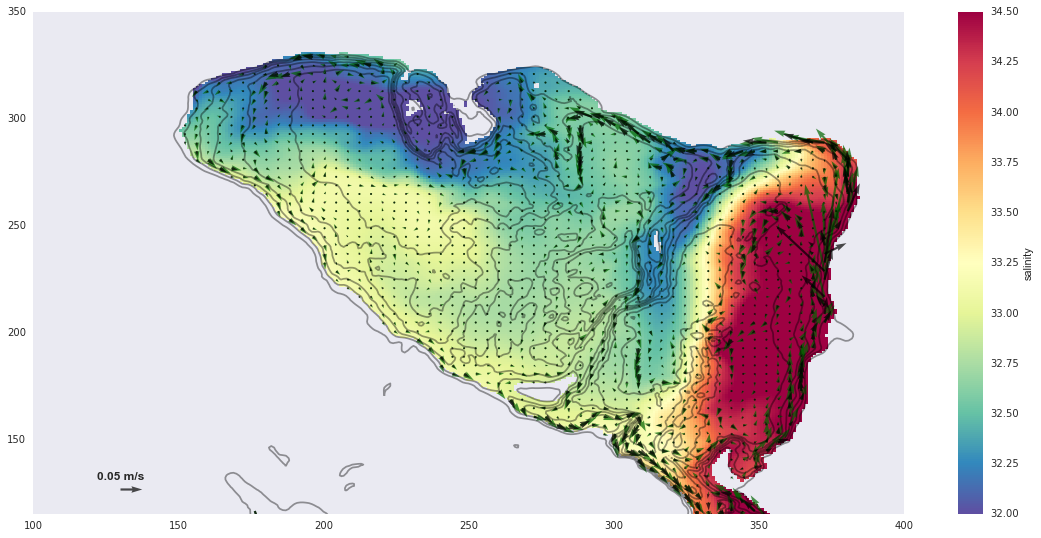

year :2014


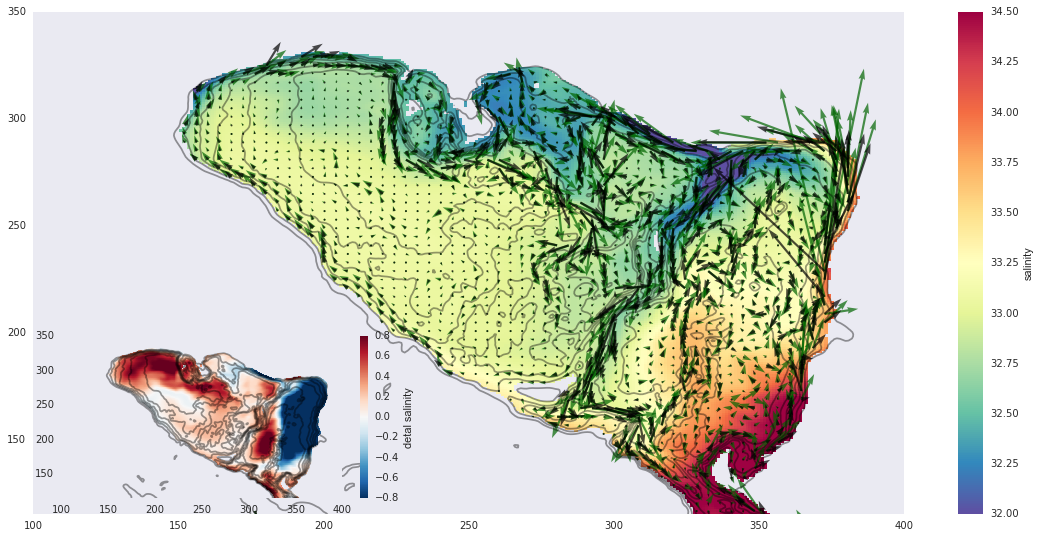

In [57]:


print ('Plot salinity maximum layer with modeled velocity')

T=2002

for year,vmin,vmax in zip ([2002,2014],[8.347e6+1000,8.347e6+1000],[8.347e6+1500,8.347e6+2400]):
    print ("year :%s"%year)
    ug_0,vg_0,P_0,nav_lat,nav_lon = geo.geoflow(\
        modelt=nc.Dataset('/ocean/xiaoxiny/research/result_jasper/data_exh001/ANHA4-EXH001_gridT_t_year%s.nc'%year),
        models=nc.Dataset('/ocean/xiaoxiny/research/result_jasper/data_exh001/ANHA4-EXH001_gridT_s_year%s.nc'%year),
        modelssh=nc.Dataset('/ocean/xiaoxiny/research/result_jasper/data_exh001/ANHA4-EXH001_gridT_ssh_year%s.nc'%year),
        layer=layer,ssh_key = 'True',detail = 'False')


    fig = plt.figure(figsize=(13*1.5,6*1.5))    
    data= hov.load_ts('S',T=year,tmask= tmask, ENG='exh001', key = '_s_')
    data = np.sum(data[:layer,:,:],axis=0)
    data = np.ma.masked_where(tmask[layer,:,:]==0,data)
    plt.pcolor(x2d[:,:], y2d[:,:], np.ma.masked_invalid(data[:,:]/layer),
               vmin=32,vmax=34.5,cmap='Spectral_r');
    
    cbar=plt.colorbar()
    cbar.set_label('salinity')
    #vector
    u= load_v('U',T=year,tmask= tmask, ENG='EXH001', key = 'U')
    v= load_v('V',T=year,tmask= tmask, ENG='EXH001', key = 'V')

    Q=plt.quiver(x2d[::4,::4], y2d[::4,::4], np.ma.masked_invalid(ug_0[::4,::4]), np.ma.masked_invalid(vg_0[::4,::4]),
               scale=2.,width=0.0025,color='darkgreen',alpha=0.7)

    Q=plt.quiver(x2d[::4,::4], y2d[::4,::4], u[layer,::4,::4], v[layer,::4,::4],
               scale=2.,width=0.0025,color='k',alpha=0.7)
    Qlabel=plt.quiverkey(Q,0.1, 0.05, 0.05, '0.05 m/s',fontproperties={'weight': 'bold'})

    plt.contour(bathy,linewidth=0.075,colors='black',alpha=0.4)
    plt.ylim(115,350)    
    plt.xlim(100,400)

    if year ==2002:
        store_s = data[:,:]/layer
    if year ==2014:
        left, bottom, width, height = [0.145, 0.15, 0.25, 0.25]
        ax = fig.add_axes([left, bottom, width, height])
        im=ax.pcolor(x2d[:,:], y2d[:,:], np.ma.masked_invalid(data[:,:]/layer-store_s),cmap='RdBu_r',
                   vmin=-0.8,vmax=0.8)
        cbar=fig.colorbar(im, ax=ax)
        cbar.set_label('detal salinity')
        plt.ylim(115,350);plt.xlim(100,400)
        plt.contour(bathy,linewidth=0.075,colors='black',alpha=0.4)
    plt.show()


looks like temperature is more dominant in density.. (because the salinity seems to have a negative relationship with density but we know this is not true.)

-- refer to the previous version (http://nbviewer.jupyter.org/urls/bitbucket.org/ccar-modeling/analysis-cindy/raw/aa4f3eba015e99af2aa149ff1e6172ab888a68a8/notebooks/phy_field/two-layer_Arctic.ipynb).


In [9]:
# quick look at vel field
Year = np.zeros((2014-2002,nav_lon.shape[0],nav_lon.shape[1]))
for year in range (2002,2014):
    temp= hov.load_ts('T',T=year,tmask= tmask, ENG='exh001', key = '_t_')
    layer= np.zeros_like(nav_lon)
    depth=np.zeros_like(nav_lon)
    for i in range (layer.shape[0]):
        for j in range (layer.shape[1]):
            layer[i,j] = np.ma.masked_invalid(temp[:45,i,j]).argmax()
            depth[i,j] = dep[layer[i,j]]

    depth [tmask [30,:,:]==0] = np.nan
    layer [tmask [30,:,:]==0] = np.nan
    Year[year-2002,:,:]=layer

In [10]:
def load_smax(year,layer):

    # assign array

    ug_0 = np.zeros_like(tmask)
    vg_0 = np.zeros_like(tmask)
    P_0 = np.zeros_like(tmask)

    # loop over the depth dimension to get full-dimension geostrophic flow
    #print ('>> loading geostrophic flow')
    #for i in range (1,len(dep)):
    #    ug_0[i,:,:],vg_0[i,:,:],P_0[i,:,:],nav_lat,nav_lon = geo.geoflow(\
    #        modelt=nc.Dataset('/ocean/xiaoxiny/research/result_jasper/data_exh001/ANHA4-EXH001_gridT_t_year%s.nc'%year),
    #        models=nc.Dataset('/ocean/xiaoxiny/research/result_jasper/data_exh001/ANHA4-EXH001_gridT_s_year%s.nc'%year),
    #        modelssh=nc.Dataset('/ocean/xiaoxiny/research/result_jasper/data_exh001/ANHA4-EXH001_gridT_ssh_year%s.nc'%year),
    #        layer=i,ssh_key = 'True',detail = 'False')

    # load u, v, t, s
    print ('>> loading u, v, t, s')
    u= load_v('U',T=year,tmask= tmask, ENG='EXH001', key = 'U')
    v= load_v('V',T=year,tmask= tmask, ENG='EXH001', key = 'V')
    t= hov.load_ts('T',T=year,tmask= tmask, ENG='exh001', key = '_t_')
    s= hov.load_ts('S',T=year,tmask= tmask, ENG='exh001', key = '_s_')

    # set up a dictionary to contain all the model result
    model={'u':u,'v':v,'ug_0':ug_0,'vg_0':vg_0,\
           't':t,'s':s}
    
    # set up an empty dictionary for latter use     
    s_max={'u':np.zeros_like(nav_lon),'v':np.zeros_like(nav_lon),\
           'ug_0':np.zeros_like(nav_lon),'vg_0':np.zeros_like(nav_lon),\
           't':np.zeros_like(nav_lon),'s':np.zeros_like(nav_lon)}


    # select data from each local s max layer
    for i in range (layer.shape[0]):
        for j in range (layer.shape[1]):
            if layer[i,j] > 0:
                for ikey in s_max.keys():
                    s_max[ikey][i,j] = model[ikey][layer[i,j],i,j]

    # mask land
    for i in s_max.keys():
        s_max[i][s_max['s'] ==0 ] = np.nan
        s_max[i]=np.ma.masked_invalid(s_max[i])
    return s_max

year :2002
>> loading u, v, t, s


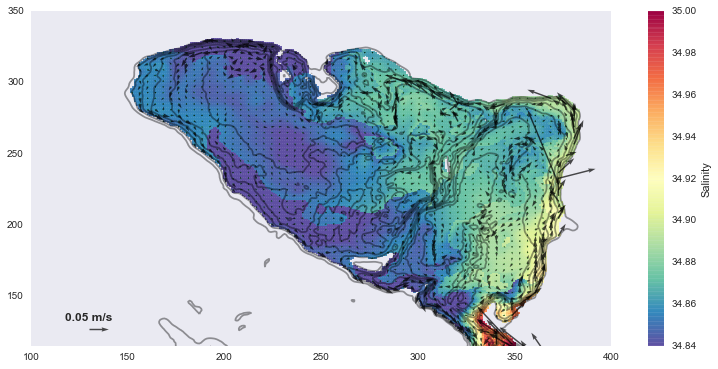

year :2003
>> loading u, v, t, s


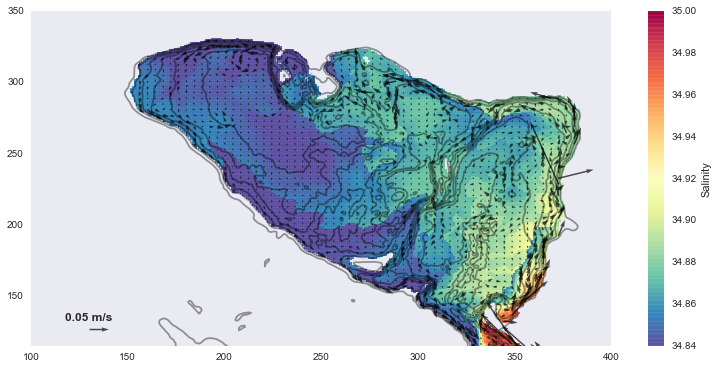

year :2004
>> loading u, v, t, s


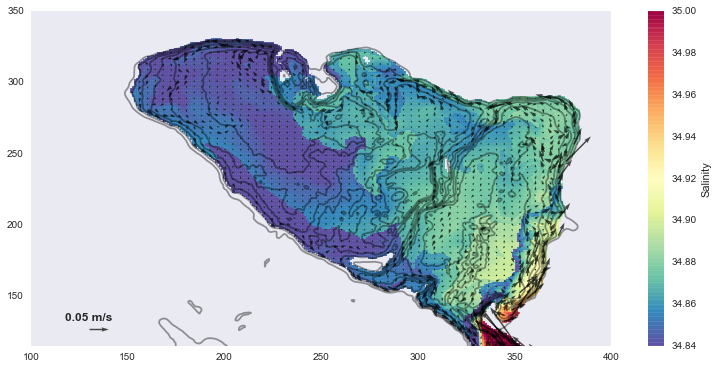

year :2005
>> loading u, v, t, s


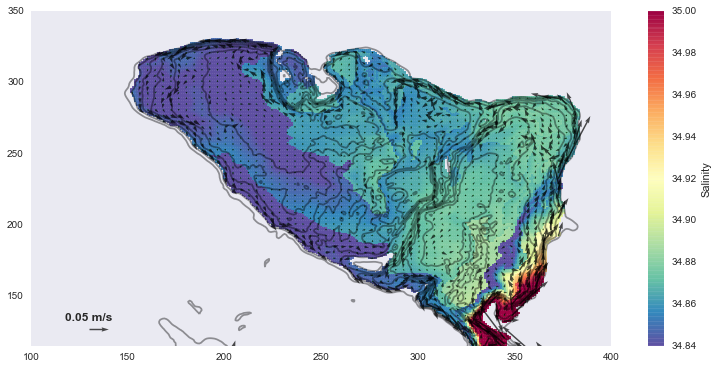

year :2006
>> loading u, v, t, s


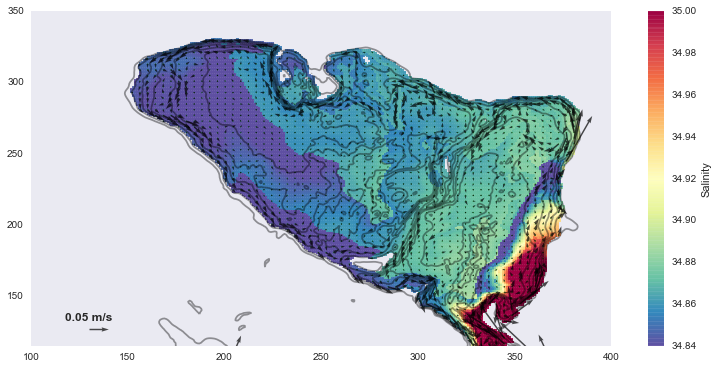

year :2007
>> loading u, v, t, s


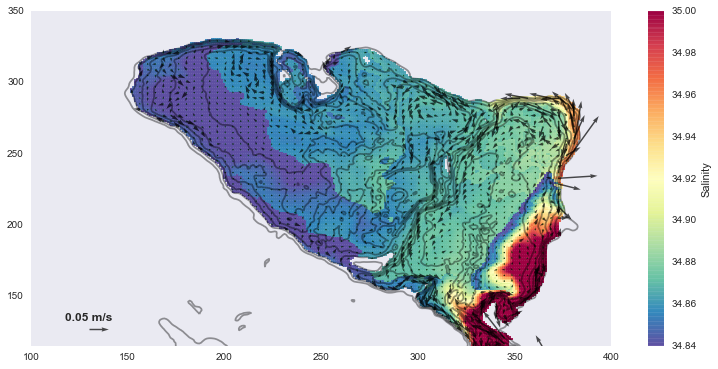

year :2008
>> loading u, v, t, s


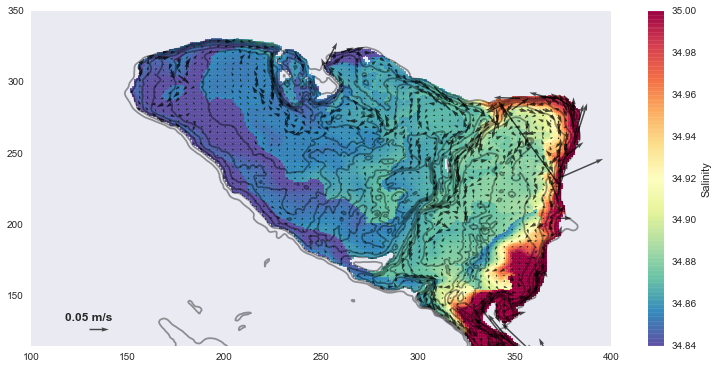

year :2009
>> loading u, v, t, s


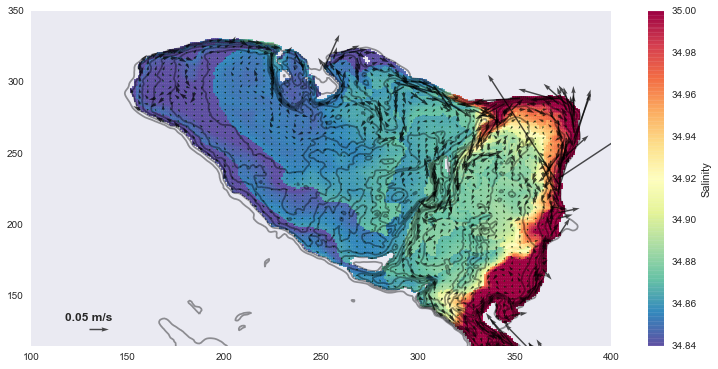

year :2010
>> loading u, v, t, s


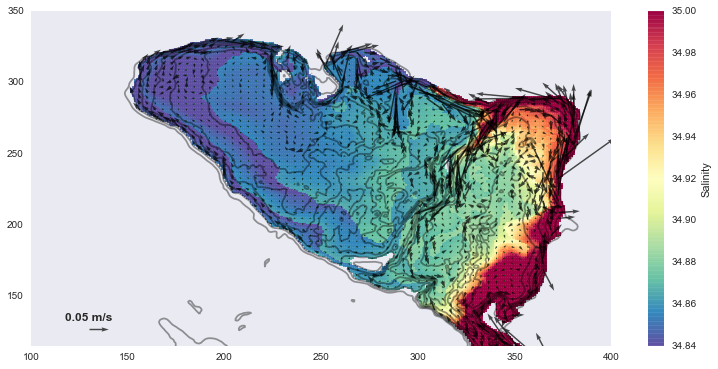

year :2011
>> loading u, v, t, s


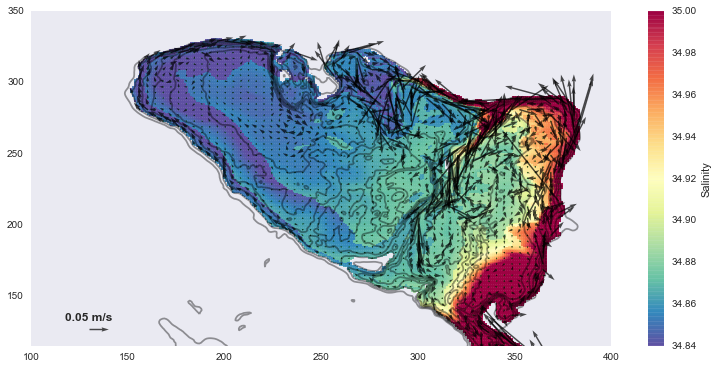

year :2012
>> loading u, v, t, s


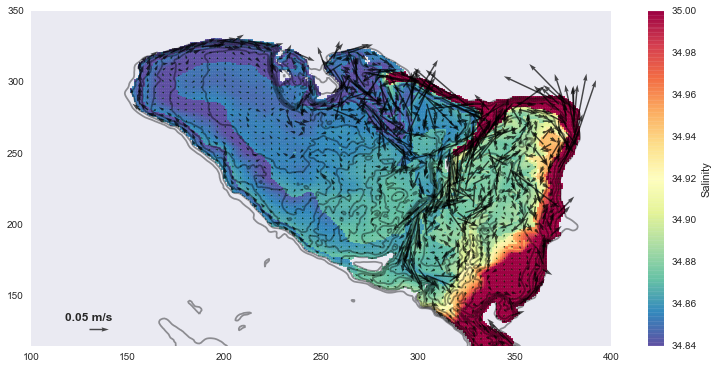

year :2013
>> loading u, v, t, s


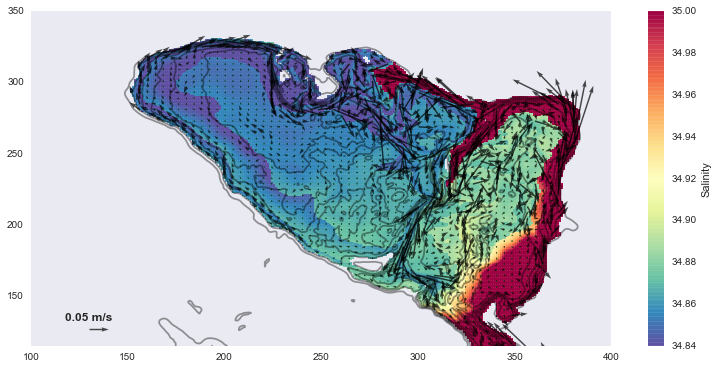

In [18]:
for year in range (2002,2014):
    print ("year :%s"%year)

    layer=Year[year-2002,...]
    fig = plt.figure(figsize=(13,6))    
    s_max = load_smax(year,layer=layer)
    
    for i in s_max.keys():
        s_max[i][tmask[35,:,:]==0]=np.nan
    plt.pcolor(x2d[:,:], y2d[:,:], np.ma.masked_invalid(s_max['s']),
               cmap='Spectral_r',vmin=34.84,vmax=35,alpha=0.9)
    cbar=plt.colorbar()
    cbar.set_label('Salinity')
    
    #vector
    Q=plt.quiver(x2d[::4,::4], y2d[::4,::4], np.ma.masked_invalid(s_max['ug_0'][::4,::4]),\
                 np.ma.masked_invalid(s_max['vg_0'][::4,::4]),
                 scale=1.5,width=0.0025,color='darkgreen',alpha=0.7)

    Q=plt.quiver(x2d[::4,::4], y2d[::4,::4], s_max['u'][::4,::4], s_max['v'][::4,::4],
               scale=1.5,width=0.0025,color='k',alpha=0.7)
    Qlabel=plt.quiverkey(Q,0.1, 0.05, 0.05, '0.05 m/s',fontproperties={'weight': 'bold'})

    plt.contour(bathy,linewidth=0.075,colors='black',alpha=0.4)
    plt.ylim(115,350)    
    plt.xlim(100,400)

    plt.show()

In [76]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')
